# Bagged Tree and Random Forest Ensembles

In [19]:
# Importing standard Libraries
import os
import pandas as pd
import numpy as np 
%matplotlib inline

In [20]:
#Set current working directory 
os.chdir('/Users/alokkumar/Desktop/Python_For_ML')

In [21]:
#Read the HR Data 
hr_data = pd.read_csv('hr.csv')

In [22]:
#View the imported data
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
#Sanity check for missing data
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [24]:
# Datatpes of the variable
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [25]:
hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [26]:
#Rename the column of sales to Department
hr_data.rename(columns={'sales':'department'},inplace= True)

In [27]:
#Creating the Predictor matrix and Target matrix on feature left
X = hr_data.drop('left',axis=1)
y = hr_data['left']

In [28]:
#Convert into dummy variables
X = pd.get_dummies(X)

In [29]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [39]:
# Training and Testing data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [40]:
# Importing Bagging Classifier and Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
#Decision Tree Classifier as Base learner in Bagging Classifier
clf = BaggingClassifier(oob_score=True,n_jobs= -1,n_estimators=20,random_state=400,base_estimator=DecisionTreeClassifier())

In [43]:
#Training the Bagged Tree
clf.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [47]:
#Out of Bag Error on Test Data
clf.score(X_test,y_test)

0.986

In [52]:
# To find the number of estimator in Bagging Tree Classifier
for w in range(10,300,20):
        clf = BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,base_estimator=DecisionTreeClassifier())
        clf.fit(X_train,y_train)
        oob = clf.oob_score_
        print("For n_estimators =" +str(w))
        print("Out of bag Score is =" +str(oob))
        print("*****************************")

For n_estimators =10
Out of bag Score is =0.9834152846070506
*****************************


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: divide by zero encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators =30
Out of bag Score is =0.9887490624218684
*****************************
For n_estimators =50
Out of bag Score is =0.9894157846487207
*****************************
For n_estimators =70
Out of bag Score is =0.9896658054837904
*****************************
For n_estimators =90
Out of bag Score is =0.9899991665972164
*****************************
For n_estimators =110
Out of bag Score is =0.9899991665972164
*****************************
For n_estimators =130
Out of bag Score is =0.9903325277106425
*****************************
For n_estimators =150
Out of bag Score is =0.990415867988999
*****************************
For n_estimators =170
Out of bag Score is =0.9902491874322861
*****************************
For n_estimators =190
Out of bag Score is =0.9902491874322861
*****************************
For n_estimators =210
Out of bag Score is =0.9903325277106425
*****************************
For n_estimators =230
Out of bag Score is =0.9903325277106425
***********************

In [54]:
# Taking the estimator value as 150 as Out of Bag Error is decreasing after it
clf = BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=150,random_state=400,base_estimator=DecisionTreeClassifier())

In [55]:
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=150, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [57]:
#Feature Importance
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_f

In [60]:
print(clf.estimators_[0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1859118377, splitter='best')


In [61]:
print(clf.estimators_[0].feature_importances_)

[5.05185266e-01 1.32251724e-01 1.09587124e-01 7.25383689e-02
 1.56214185e-01 9.76820763e-04 3.25164961e-04 9.23689326e-04
 1.08236025e-03 2.53569257e-03 4.89440705e-04 1.25078175e-03
 8.91752891e-04 8.14953601e-04 2.43254883e-03 2.96508657e-03
 3.16484751e-03 5.68842690e-04 4.96944845e-03 8.31900643e-04]


In [64]:
#Extracting Feature importance of all the trees and taking mean of all
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp = np.mean(imp,axis=0)

In [66]:
feature_importance = pd.Series(imp,index = X.columns.tolist())

In [67]:
feature_importance.sort_values(ascending = False)

satisfaction_level        0.494260
last_evaluation           0.138175
time_spend_company        0.137465
number_project            0.110373
average_montly_hours      0.097373
department_technical      0.003132
salary_low                0.003084
department_support        0.002837
department_sales          0.002542
salary_medium             0.002088
Work_accident             0.001566
department_IT             0.001562
department_accounting     0.001390
salary_high               0.000880
department_marketing      0.000712
department_product_mng    0.000667
department_RandD          0.000642
department_hr             0.000590
department_management     0.000490
promotion_last_5years     0.000174
dtype: float64

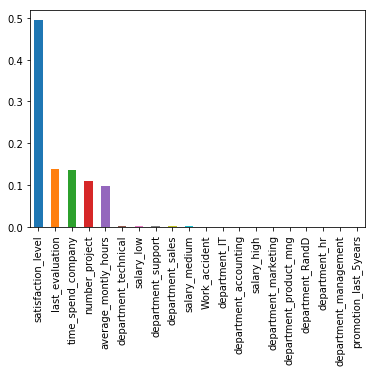

In [70]:
# Satisfaction Level , Last evaluation , time_spend_company are the most important features.
feature_importance.sort_values(ascending = False).plot(kind ='bar')

# Random Forest Classifier


In [71]:
from sklearn.ensemble import RandomForestClassifier


In [75]:
clf = RandomForestClassifier(oob_score = True,n_jobs = -1, n_estimators=80 , random_state = 400)

In [76]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [77]:
clf.oob_score_

0.9905825485457121

In [79]:
# Finding the number of estimators for Random Forest
for w in range(10,300,20):
    clf = RandomForestClassifier(oob_score = True , n_jobs=-1,n_estimators=w,random_state= 400)
    clf.fit(X_train,y_train)
    oob = clf.oob_score_
    print("For n_estimator " +str(w))
    print("Oob Score is " +str(oob))
    print("************************")

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimator 10
Oob Score is 0.9832486040503375
************************
For n_estimator 30
Oob Score is 0.9894991249270773
************************
For n_estimator 50
Oob Score is 0.990082506875573
************************
For n_estimator 70
Oob Score is 0.9905825485457121
************************
For n_estimator 90
Oob Score is 0.9904992082673556
************************
For n_estimator 110
Oob Score is 0.9908325693807817
************************
For n_estimator 130
Oob Score is 0.9908325693807817
************************
For n_estimator 150
Oob Score is 0.9905825485457121
************************
For n_estimator 170
Oob Score is 0.9909992499374948
************************
For n_estimator 190
Oob Score is 0.9909159096591382
************************
For n_estimator 210
Oob Score is 0.9908325693807817
************************
For n_estimator 230
Oob Score is 0.9908325693807817
************************
For n_estimator 250
Oob Score is 0.9907492291024252
************************
For n

In [80]:
#n_estimator = 190 as value of oob_score maximum
clf = RandomForestClassifier(n_estimators=190,n_jobs=-1,oob_score=True,random_state=400)

In [81]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [82]:
clf.oob_score_

0.9909159096591382

In [83]:
#Feature importances
clf.feature_importances_

array([0.3138384 , 0.12430711, 0.18396834, 0.1514369 , 0.17650121,
       0.01018415, 0.00196677, 0.00182788, 0.0017952 , 0.00173233,
       0.00172401, 0.00170841, 0.00123802, 0.00118133, 0.00353554,
       0.00299638, 0.00370561, 0.00560635, 0.00722435, 0.00352169])

In [85]:
feature_importance = pd.Series(clf.feature_importances_ , index = X.columns.tolist())

In [86]:
feature_importance.sort_values(ascending = False)

satisfaction_level        0.313838
number_project            0.183968
time_spend_company        0.176501
average_montly_hours      0.151437
last_evaluation           0.124307
Work_accident             0.010184
salary_low                0.007224
salary_high               0.005606
department_technical      0.003706
department_sales          0.003536
salary_medium             0.003522
department_support        0.002996
promotion_last_5years     0.001967
department_IT             0.001828
department_RandD          0.001795
department_accounting     0.001732
department_hr             0.001724
department_management     0.001708
department_marketing      0.001238
department_product_mng    0.001181
dtype: float64

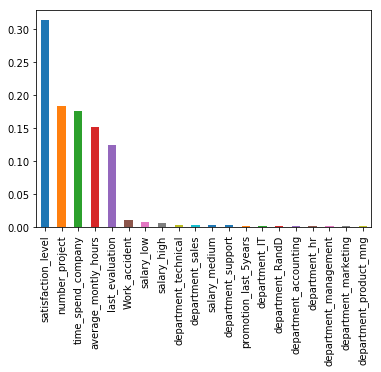

In [91]:
feature_importance.sort_values(ascending = False).plot(kind = 'bar')